#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***


# Imports

In [857]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns

## Data Import

In [858]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-858-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


In [859]:
df.shape

(46189, 25)

## Data first 5 rows

In [860]:
df.head(5)

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [861]:
# Missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


In [862]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


In [863]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34788
Single Fracture,6737
Head Injury,3503
Multiple Fractures,778
Spinal Injury,381


#Droping Features



In [864]:
df['EcNumber'].value_counts()


,count
EcNumber,
598,2
256,2
21582,2
246,2
247,2
...,...
13946,1
13949,1
13951,1


In [865]:
df['HospitalName'].value_counts()

,count
HospitalName,
BBH,6953
DHQ,6099
PIMS,1663
"RHC,Mandra,Rawalpindi",1655
Wah General Hospital,1231
...,...
"THQ, Fateh Jang",1
"Nissa Nursing Home, Rawalpindi",1
"Nadeem Clinic, Rwp",1


In [866]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


In [867]:
df['CallTime'].value_counts()

,count
CallTime,
1/3/21 10:07,3
9/30/20 13:35,3
12/3/20 19:58,2
10/13/20 8:36,2
9/24/22 21:07,2
...,...
8/29/21 13:23,1
8/29/21 13:07,1
8/29/21 13:04,1


In [868]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34788
Single Fracture,6737
Head Injury,3503
Multiple Fractures,778
Spinal Injury,381


##Info

` EcNumber, HospitalName, TotalPatientsInEmergency, PatientStatus and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



###Doubt

`I have a doubt regarding the correlation between the TotalPatientsInEmergency and the target value. So I investigate this:`

In [869]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1125
3,456
4,364
5,190
4,120


In [870]:
#drop 'Alive & unstable' row from TotalPatientsInEmergency
# df = df[df['TotalPatientsInEmergency'] != 'Alive & unstable']

In [871]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1125
3,456
4,364
5,190
4,120


In [872]:



data = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')
data = data[data['TotalPatientsInEmergency'] != 'Alive & unstable']
label_encoder = LabelEncoder()
data['InjuryType_encoded'] = label_encoder.fit_transform(data['InjuryType'])
correlation = data[['TotalPatientsInEmergency', 'InjuryType_encoded']].corr()

correlation


<ipython-input-872-bfa7d11bfd40>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


,TotalPatientsInEmergency,InjuryType_encoded
TotalPatientsInEmergency,1.000000,-0.004561
InjuryType_encoded,-0.004561,1.000000


###Doubt Output
`Based on the output, the correlation between TotalPatientsInEmergency and InjuryType is extremely low, at -0.004561. This indicates that there is virtually no linear relationship between the number of patients in an emergency and the type of injury.`

In [873]:
df = df.drop(['EcNumber', 'HospitalName', 'TotalPatientsInEmergency','PatientStatus', 'CallTime'], axis=1)

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46189 non-null  object 
 1   EmergencyArea      46189 non-null  object 
 2   Gender             46188 non-null  object 
 3   Age                46188 non-null  float64
 4   Reason             46188 non-null  object 
 5   responsetime       46184 non-null  float64
 6   EducationTitle     46188 non-null  object 
 7   InjuryType         46187 non-null  object 
 8   Cause              46187 non-null  object 
 9   BicycleInvovled    46187 non-null  float64
 10  BikesInvolved      46187 non-null  float64
 11  BusesInvolved      46187 non-null  float64
 12  CarsInvolved       46187 non-null  float64
 13  CartInvovled       46187 non-null  float64
 14  RickshawsInvolved  46187 non-null  float64
 15  TractorInvovled    46187 non-null  float64
 16  TrainsInvovled     461

#Filling the Missing Values


In [875]:
# df.duplicated().sum()

In [876]:
# df.drop_duplicates(inplace =True)

In [877]:
# df.shape

In [878]:
#missing values
df.isnull().sum()

,0
EcYear,0
EmergencyArea,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
BicycleInvovled,2


##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [879]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-879-05988a5f2a05>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EcYear,0
EmergencyArea,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
BicycleInvovled,0


In [880]:
df[df.duplicated()]

,EcYear,EmergencyArea,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,2020,Near sehal village chakri road Rwp,Male,42.0,same,8.0,Matric,Minor,Carelessness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,2020,Infront of ashraf marriage hall dhoke hafiz ...,Male,16.0,same,3.0,Matric,Minor,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5990,2020,"Mohri Khadran Stop, Near Pakistan Copoperative...",Male,18.0,same,20.0,Primary,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6037,2020,Near flying Club Old airport road rwp,Male,18.0,Same,7.0,Primary,Minor,Over Speed,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,2020,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,Male,17.0,same,7.0,Matric,Minor,Over Speed,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,2020,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,Male,50.0,same,6.0,Primary,Minor,U Turn,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,2020,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",Female,45.0,Same,7.0,Middle,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,2021,ranial near ranial choki chakri road rwp,Male,27.0,Same,8.0,Illetrate,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,2021,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",Male,18.0,Same,12.0,Primary,Minor,Carelessness,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20119,2021,"Rawal road t/w ali nawaz, rwp",Male,36.0,same,6.0,Illetrate,Minor,Over Speed,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [881]:
df.duplicated().sum()

30

#Encoding the categorical columns

In [882]:
df.drop_duplicates(inplace =True)

In [883]:
 df.shape

(46159, 20)

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46159 non-null  object 
 1   EmergencyArea      46159 non-null  object 
 2   Gender             46159 non-null  object 
 3   Age                46159 non-null  float64
 4   Reason             46159 non-null  object 
 5   responsetime       46159 non-null  float64
 6   EducationTitle     46159 non-null  object 
 7   InjuryType         46159 non-null  object 
 8   Cause              46159 non-null  object 
 9   BicycleInvovled    46159 non-null  float64
 10  BikesInvolved      46159 non-null  float64
 11  BusesInvolved      46159 non-null  float64
 12  CarsInvolved       46159 non-null  float64
 13  CartInvovled       46159 non-null  float64
 14  RickshawsInvolved  46159 non-null  float64
 15  TractorInvovled    46159 non-null  float64
 16  TrainsInvovled     46159 no

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EcYear
* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause
* PatientStatus

Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [885]:
df['EcYear'].value_counts()


,count
EcYear,
2021,12669
2020,11375
2023,9217
2022,8705
2022,4192
Hospital,1


In [886]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11713
Illetrate,10834
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


###Info

```
For the columns EcYear and EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EcYear follows a natural chronological sequence, where earlier years are logically ordered before later years.
- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EcYear Encoding

In [887]:
# Ordinal Encoding for EcYear
from sklearn.preprocessing import OrdinalEncoder
df['EcYear'] = df['EcYear'].astype(str)
# df['EducationTitle'] = df['EducationTitle'].astype(str)
encoder = OrdinalEncoder()
df['EcYear'] = encoder.fit_transform(df[['EcYear']])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46159 non-null  float64
 1   EmergencyArea      46159 non-null  object 
 2   Gender             46159 non-null  object 
 3   Age                46159 non-null  float64
 4   Reason             46159 non-null  object 
 5   responsetime       46159 non-null  float64
 6   EducationTitle     46159 non-null  object 
 7   InjuryType         46159 non-null  object 
 8   Cause              46159 non-null  object 
 9   BicycleInvovled    46159 non-null  float64
 10  BikesInvolved      46159 non-null  float64
 11  BusesInvolved      46159 non-null  float64
 12  CarsInvolved       46159 non-null  float64
 13  CartInvovled       46159 non-null  float64
 14  RickshawsInvolved  46159 non-null  float64
 15  TractorInvovled    46159 non-null  float64
 16  TrainsInvovled     46159 no

###EcYear Visualization Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


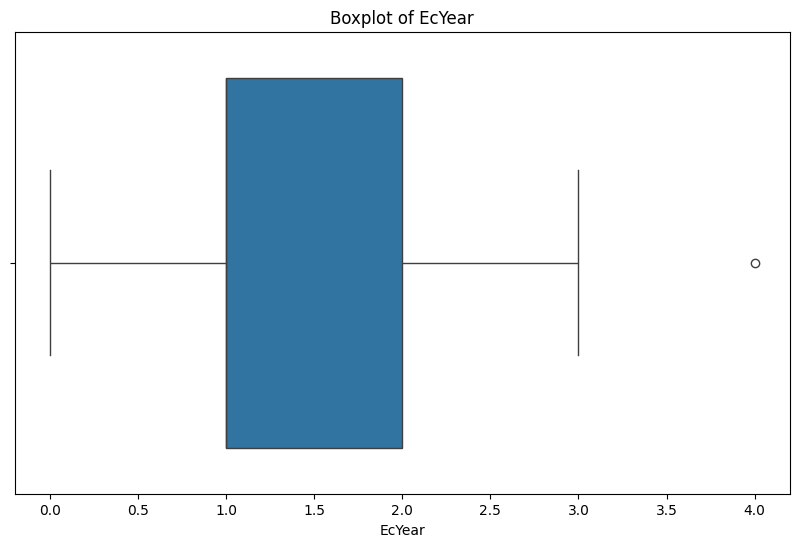

In [888]:
#boxplot for column EcYear
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EcYear'])
plt.title('Boxplot of EcYear')
plt.show()

In [889]:
Q1 = df['EcYear'].quantile(0.25)
Q3 = df['EcYear'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EcYear'] < lower_bound) | (df['EcYear'] > upper_bound)]
outliers

,EcYear,EmergencyArea,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31356,4.0,Single Fracture,0,0.0,0,1.0,0,Minor,Carelessness,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [890]:
df = df[(df['EcYear'] >= lower_bound) & (df['EcYear'] <= upper_bound)]
df.shape

(46158, 20)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='EcYear'>

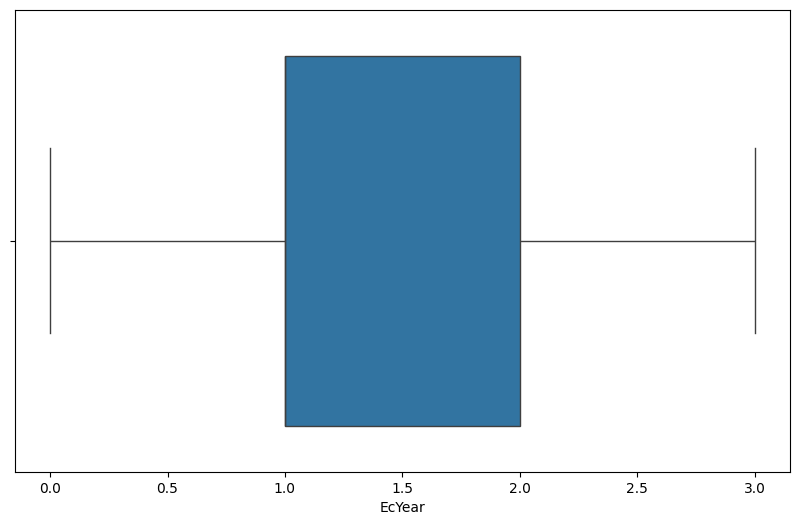

In [891]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EcYear'])

###EducationTitle Visualization Bar chart




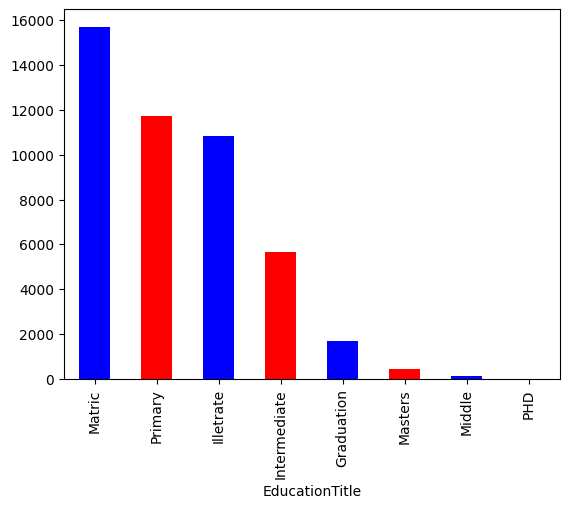

In [892]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [893]:
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  object 
 2   Gender             46158 non-null  object 
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  object 
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  object 
 8   Cause              46158 non-null  object 
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

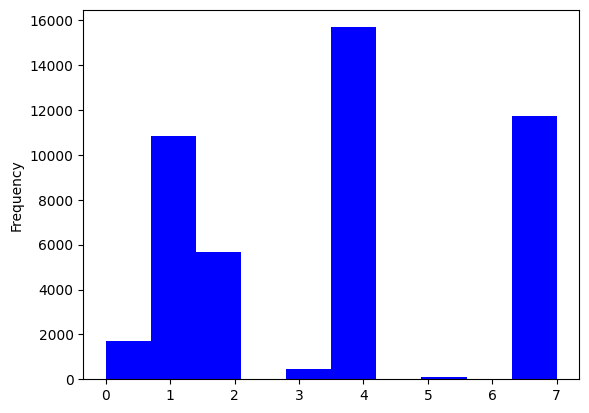

In [894]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

###EducationTitle Visualization Box plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


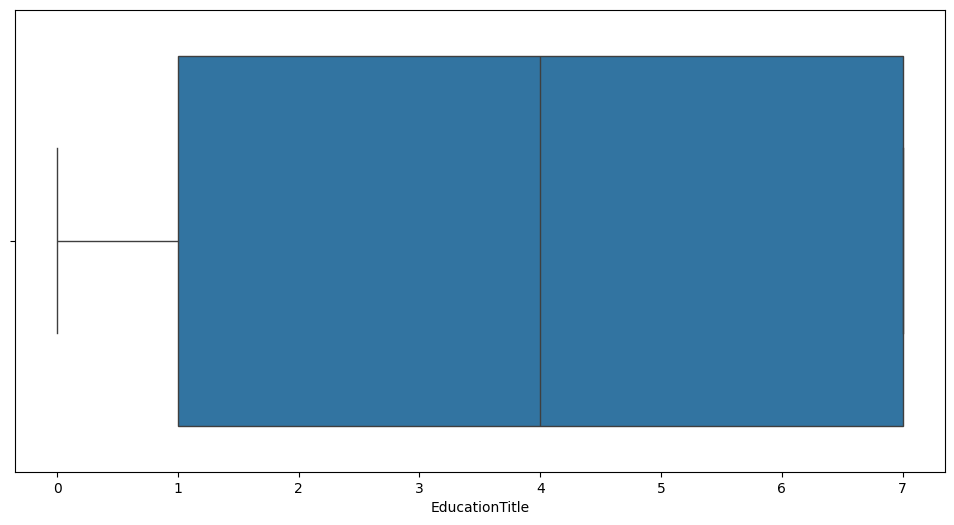

In [895]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

In [896]:

Q1 = df['EducationTitle'].quantile(0.25)
Q3 = df['EducationTitle'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EducationTitle'] < lower_bound) | (df['EducationTitle'] > upper_bound)]
outliers

,EcYear,EmergencyArea,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved


###InjuryType Visualization Bar Chart

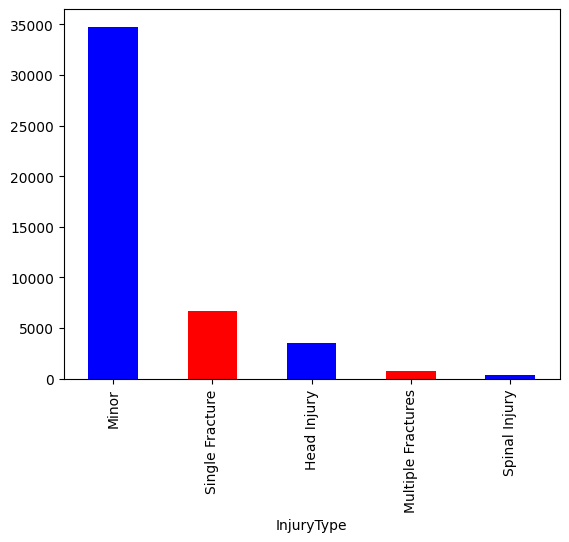

In [897]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [898]:
encoder = OrdinalEncoder()
df['InjuryType'] = encoder.fit_transform(df[['InjuryType']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  object 
 2   Gender             46158 non-null  object 
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  object 
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  float64
 8   Cause              46158 non-null  object 
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

In [899]:
df['InjuryType'].value_counts()

,count
InjuryType,
1.0,34764
3.0,6736
0.0,3499
2.0,778
4.0,381


###InjuryType Visualization histogram


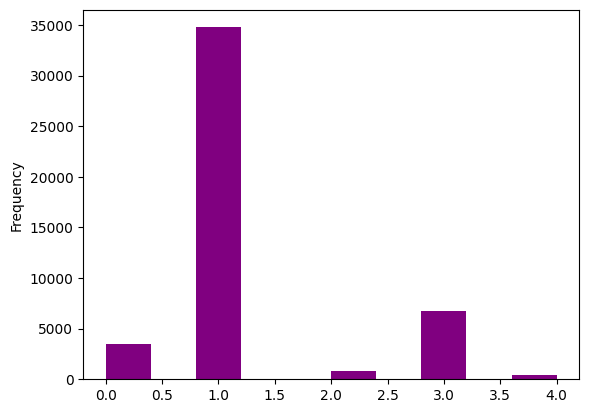

In [900]:
df['InjuryType'].plot(kind='hist', color='purple')


plt.show()

##Frequency Encoding

In [901]:
df['EmergencyArea'].head(2)

,EmergencyArea
0,NEAR APS SCHOOL FORT ROAD RWP
1,"Infront of Daig.com, Near Dha gate 2, gt road..."


In [902]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


###Info

```
The EmergencyArea column contains many categories, and the frequency of each category can provide valuable
information. For example, if a patient was injured at "Railway Track Underpass Nazar Chowk Near Kacheri"
(which has a frequency of 42), they may be more likely to have severe injuries compared to a patient injured
at "Abid Majeed Road Front of CSD Rwp" (which has a frequency of 1).

Given this, we will apply Frequency Encoding to the EmergencyArea column. This encoding technique will replace
each unique location with the count of its occurrences in the dataset. This method allows us to incorporate the
importance of location frequency into the model, which can potentially reveal patterns related to injury type.
```



###EmergencyArea Frequency *Encoding*

In [903]:
frequency_encoding = df['EmergencyArea'].value_counts().to_dict()
df['EmergencyArea'] = df['EmergencyArea'].map(frequency_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  int64  
 2   Gender             46158 non-null  object 
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  object 
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  float64
 8   Cause              46158 non-null  object 
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

In [904]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
1,32370
2,7688
3,2220
4,832
5,595
6,384
7,273
11,209
9,207


###EmergencyArea Visualization Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


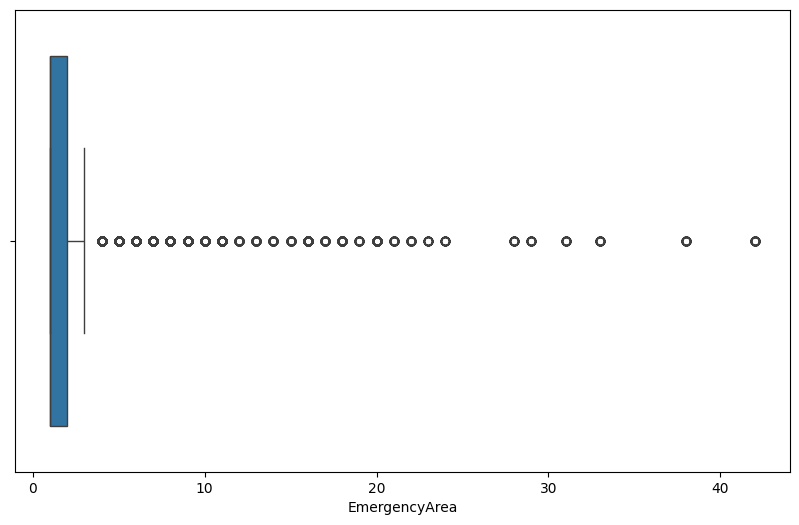

In [905]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()


In [906]:
Q1 = df['EmergencyArea'].quantile(0.25)
Q3 = df['EmergencyArea'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['EmergencyArea'] < lower_bound) | (df['EmergencyArea'] > upper_bound)]
outliers

,EcYear,EmergencyArea,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
243,0.0,4,Male,30.0,Same,5.0,7.0,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,4,Male,38.0,Same,5.0,1.0,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,0.0,4,Male,19.0,Bike hit another Bike,5.0,1.0,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,0.0,4,Male,20.0,Same,5.0,1.0,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.0,4,Male,32.0,same,10.0,7.0,1.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46135,3.0,15,Male,53.0,"Due to muddy road, bike slipped , bike# S-145...",2.0,7.0,0.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46138,3.0,11,Male,95.0,Motorcycle hitted to the pedistrian during cro...,9.0,1.0,3.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46139,3.0,7,Male,45.0,Motor bike ( RIL 9064) key pechley tyre mein ...,9.0,2.0,1.0,Carelessness,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46143,3.0,18,Male,20.0,As per patient he was on bike ( AWN 638 Honda...,4.0,4.0,3.0,Over Speed,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###EmergencyArea Visualization Histogram

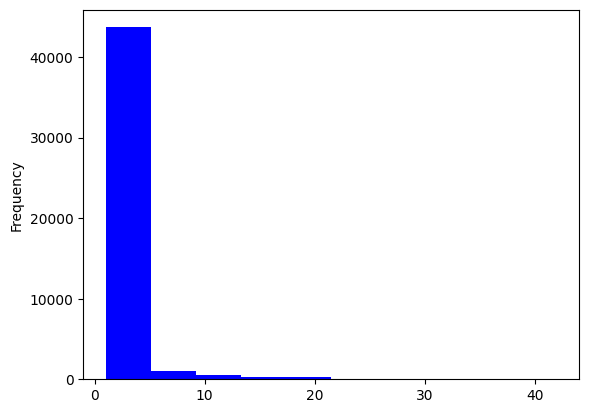

In [907]:
df['EmergencyArea'].plot(kind='hist', color=['blue', 'red'])
plt.show()

In [908]:
df['Reason'].value_counts()

,count
Reason,
same,2316
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1
Unknown van hit the bike (APF-22 US 70cc) and runaway,1


###Check Reason Corelated with Cause?

In [909]:
# same_reason_df = df[df['Reason'] == 'same']
# same_reason_cause_counts = same_reason_df['Cause'].value_counts()

# same_reason_cause_counts

###Reason and Cause Categorical Heatmap

In [910]:



# same_reason_df = df[df['Reason'] == 'same']
# cause_reason_crosstab = pd.crosstab(same_reason_df['Cause'], same_reason_df['Reason'])


# plt.figure(figsize=(10, 6))
# sns.heatmap(cause_reason_crosstab,fmt='g', annot=True, cmap='Blues')


# plt.title('Heatmap of Cause for Reason = "same"')
# plt.xlabel('Reason')
# plt.ylabel('Cause')

# # Show the plot
# plt.show()


###info




```
For the Cause column, we can analyze the frequency of different causes
of injuries to capture their potential impact. For instance, if the cause of injury is "Over Speeding" (with a frequency of 29586),
 it may indicate a higher likelihood of severe injuries compared to a cause like "Wrong Turn"
(which has a frequency of 845).

Given this, we will apply Frequency Encoding to the Cause column. This encoding technique will replace each
unique cause with the count of its occurrences in the dataset.
```



In [911]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29567
Carelessness,14168
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


###Cause Visualization Bar chart




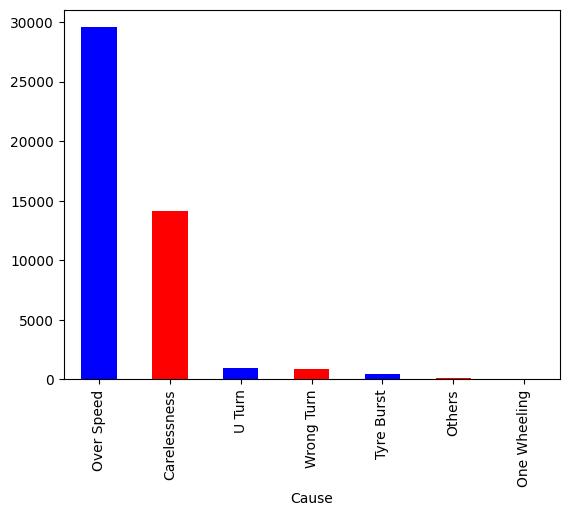

In [912]:
df['Cause'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###Cause Frequency Encoding

In [913]:
frequency_encoding = df['Cause'].value_counts().to_dict()
df['Cause'] = df['Cause'].map(frequency_encoding)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  int64  
 2   Gender             46158 non-null  object 
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  object 
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  float64
 8   Cause              46158 non-null  int64  
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

In [914]:
df['Cause'].value_counts()

,count
Cause,
29567,29567
14168,14168
933,933
841,841
481,481
104,104
64,64


###Cause Visualization Box plot


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


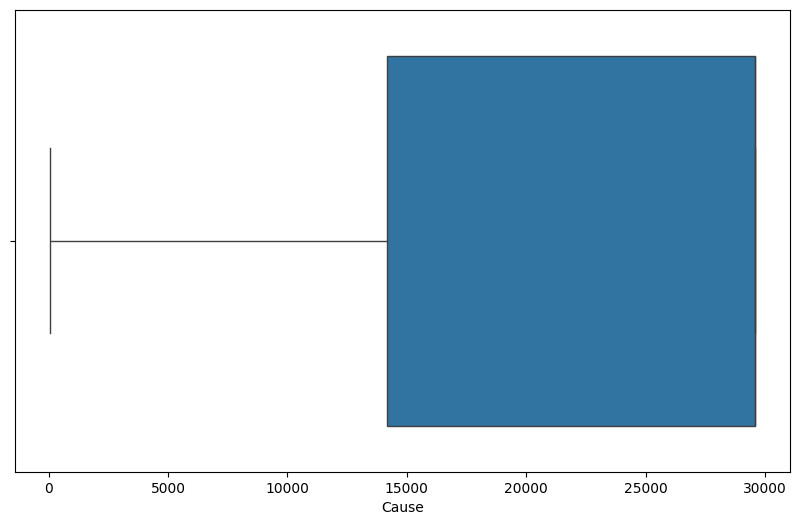

In [915]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Cause'])

plt.show()


In [916]:
Q1 = df['Cause'].quantile(0.25)
Q3 = df['Cause'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['Cause'] < lower_bound) | (df['Cause'] > upper_bound)]
outliers


,EcYear,EmergencyArea,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved


###Cause Visualization Histogram


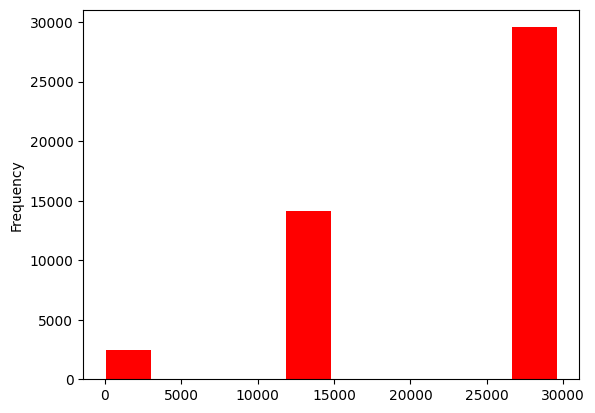

In [917]:
df['Cause'].plot(kind='hist', color=[ 'red'])
plt.show()

###info




```
For the Reason column, the frequency of each reason for an incident can also provide valuable insights. For example, if the reason is
"Driver Fatigue" (with a frequency of 85), it may be more associated with severe injuries compared to a less frequent reason like
"Pedestrian Error" (with a frequency of 8).

Given this, we will apply Frequency Encoding to the Reason column. This method will replace each unique reason with the
count of its occurrences in the dataset.
```






In [918]:
df['Reason'].value_counts()

,count
Reason,
same,2316
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1
Unknown van hit the bike (APF-22 US 70cc) and runaway,1


###Fill 'Same' data with forward fill

In [919]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-919-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1
Car hit the bike(Rik746) and ranaway,1


###Reason Encoding

In [920]:
frequency_encoding = df['Reason'].value_counts().to_dict()
df['Reason'] = df['Reason'].map(frequency_encoding)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  int64  
 2   Gender             46158 non-null  object 
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  int64  
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  float64
 8   Cause              46158 non-null  int64  
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

In [921]:
df['Reason'].value_counts()

,count
Reason,
1,19635
2,5670
3,1824
1330,1330
1039,1039
...,...
46,46
41,41
38,38


###Reason Visualization Histogram


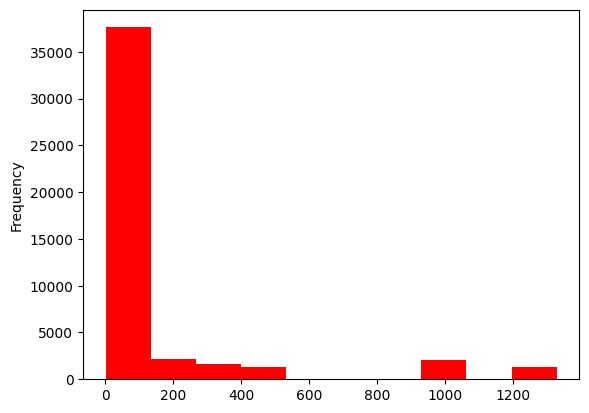

In [922]:
df['Reason'].plot(kind='hist', color=[ 'red'])
plt.show()

##Label Encoding

In [923]:
df['Gender'].value_counts()



,count
Gender,
Male,39768
Female,6389
Other,1


###Info

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



###Gender Visualization Pie chart


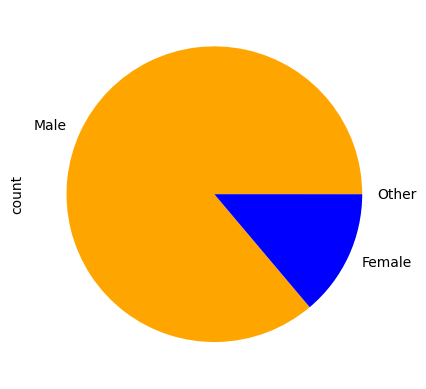

In [924]:
df['Gender'].value_counts().plot(kind='pie', colors=['orange', 'blue','purple'])
plt.show()

###Gender Visualization Bar chart


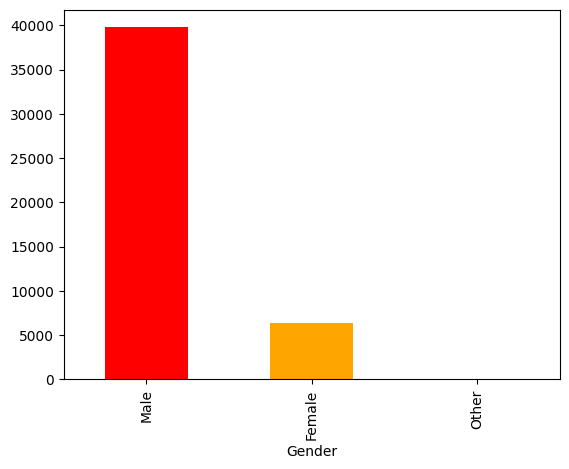

In [925]:
df['Gender'].value_counts().plot(kind='bar', color=['red', 'orange','purple'])
plt.show()

In [926]:
df['Gender'].value_counts()

,count
Gender,
Male,39768
Female,6389
Other,1


###Gender Label Encode

In [927]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46158 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EcYear             46158 non-null  float64
 1   EmergencyArea      46158 non-null  int64  
 2   Gender             46158 non-null  int64  
 3   Age                46158 non-null  float64
 4   Reason             46158 non-null  int64  
 5   responsetime       46158 non-null  float64
 6   EducationTitle     46158 non-null  float64
 7   InjuryType         46158 non-null  float64
 8   Cause              46158 non-null  int64  
 9   BicycleInvovled    46158 non-null  float64
 10  BikesInvolved      46158 non-null  float64
 11  BusesInvolved      46158 non-null  float64
 12  CarsInvolved       46158 non-null  float64
 13  CartInvovled       46158 non-null  float64
 14  RickshawsInvolved  46158 non-null  float64
 15  TractorInvovled    46158 non-null  float64
 16  TrainsInvovled     46158 no

In [928]:
df['Gender'].value_counts()

,count
Gender,
1,39768
0,6389
2,1


###InjuryType OneHot Encode

In [929]:

# encoder = OneHotEncoder(sparse_output=False)
# arr = encoder.fit_transform(df[['InjuryType']])
# encoded_columns = encoder.get_feature_names_out(['InjuryType'])
# en_df = pd.DataFrame(arr, columns=encoded_columns)
# df = pd.concat([df, en_df], axis=1)
# df = df.drop(['InjuryType'], axis=1)
# df.info()

# **why we should do feature scalling after spliting dataset into train and test set?**

***Feature scaling should be performed after splitting the dataset into training and test sets to avoid data leakage and ensure fair model evaluation. If scaling is done before the split, information from the test set (like the mean or range of values) could influence the scaling process, which leads to overfitting and artificially inflated performance metrics. By scaling only the training data and applying the same transformation to the test set, the model is evaluated on truly unseen data, providing a more realistic measure of its generalization ability. This approach mimics real-world scenarios where future data must be scaled consistently with the training data.***

#Split Into Train and Test Sets

In [930]:
#Define the feature columns exclude  the target columns
feature_columns = df.columns.difference(df['InjuryType'])

#Create feature X and target Y
X = df[feature_columns]
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [931]:
X_train.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
7034,20.0,0.0,2.0,0.0,0.0,0.0,29567,0.0,4.0,3,1,1.0,0.0,187,0.0,0.0,0.0,0.0,0.0,2.0
31076,33.0,0.0,1.0,0.0,0.0,0.0,29567,2.0,4.0,1,1,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,3.0


In [932]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (36926, 20)
X_test shape: (9232, 20)
Y_train shape: (36926,)
Y_test shape: (9232,)


#Feature Scalling

##Info



```
Since we have not yet determined which model to use,
we cannot apply a specific method for feature scaling.
 Different models perform optimally with either normalization or standardization, so it is essential to identify the appropriate
 model before deciding on the most effective scaling technique.
```



###Standardization


In [933]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)



In [934]:
X_train_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,-0.821091,-0.09202,1.787997,-0.090992,-0.520736,-0.045113,0.708285,-1.342098,0.149142,0.290392,0.403036,-0.312506,-0.098811,0.195757,-0.301682,-0.099223,-0.046596,-0.203607,-0.350379,-0.866891
1,0.034189,-0.09202,0.059179,-0.090992,-0.520736,-0.045113,0.708285,0.533122,0.149142,-0.306973,0.403036,-0.312506,-0.098811,-0.407896,-0.301682,-0.099223,-0.046596,-0.203607,2.626633,-0.663864


In [935]:
X_test_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,1.284213,-0.09202,-1.669640,-0.090992,1.71412,-0.045113,0.708285,-0.404488,1.446686,-0.306973,0.403036,-0.312506,-0.098811,-0.330005,3.146142,-0.099223,-0.046596,-0.203607,-0.350379,-0.257811
1,-0.492137,-0.09202,0.059179,-0.090992,1.71412,-0.045113,0.708285,0.533122,0.149142,-0.008291,0.403036,-0.312506,-0.098811,-0.242378,-0.301682,-0.099223,-0.046596,-0.203607,-0.350379,-0.460837


###Min-Max Scalling



In [936]:
# Initialize the MinMaxScaler (default range is 0 to 1)
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
# The scaler is fit only on X_train to avoid data leakage from the test set
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling (optional)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=feature_columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=feature_columns)



In [937]:
X_train_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.169492,0.0,0.2,0.0,0.0,0.0,1.0,0.000000,0.571429,0.04878,0.5,0.25,0.0,0.139955,0.0,0.0,0.0,0.0,0.00,0.01
1,0.279661,0.0,0.1,0.0,0.0,0.0,1.0,0.666667,0.571429,0.00000,0.5,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.02


In [938]:
X_test_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.440678,0.0,0.0,0.0,0.2,0.0,1.0,0.333333,1.000000,0.00000,0.5,0.25,0.0,0.018059,0.5,0.0,0.0,0.0,0.0,0.04
1,0.211864,0.0,0.1,0.0,0.2,0.0,1.0,0.666667,0.571429,0.02439,0.5,0.25,0.0,0.038375,0.0,0.0,0.0,0.0,0.0,0.03


###Normalization

In [939]:


# Initialize the Normalizer
normalizer = Normalizer()

# Normalize the data after imputation
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Convert normalized arrays back to DataFrames for easier handling
X_train_normalized = pd.DataFrame(X_train_normalized, columns=feature_columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=feature_columns)



In [940]:
X_train_normalized.head(2)


,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.000676,0.0,0.000068,0.0,0.0,0.0,0.999980,0.000000,0.000135,0.000101,0.000034,0.000034,0.0,0.006324,0.0,0.0,0.0,0.0,0.000000,0.000068
1,0.001116,0.0,0.000034,0.0,0.0,0.0,0.999999,0.000068,0.000135,0.000034,0.000034,0.000034,0.0,0.000034,0.0,0.0,0.0,0.0,0.000034,0.000101


In [941]:
X_test_normalized.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EcYear,EducationTitle,EmergencyArea,Gender,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.001759,0.0,0.000000,0.0,0.000034,0.0,0.999998,0.000034,0.000237,0.000034,0.000034,0.000034,0.0,0.000846,0.000034,0.0,0.0,0.0,0.0,0.000169
1,0.000846,0.0,0.000034,0.0,0.000034,0.0,0.999998,0.000068,0.000135,0.000068,0.000034,0.000034,0.0,0.001759,0.000000,0.0,0.0,0.0,0.0,0.000135


#Visualization

##Histogram plot

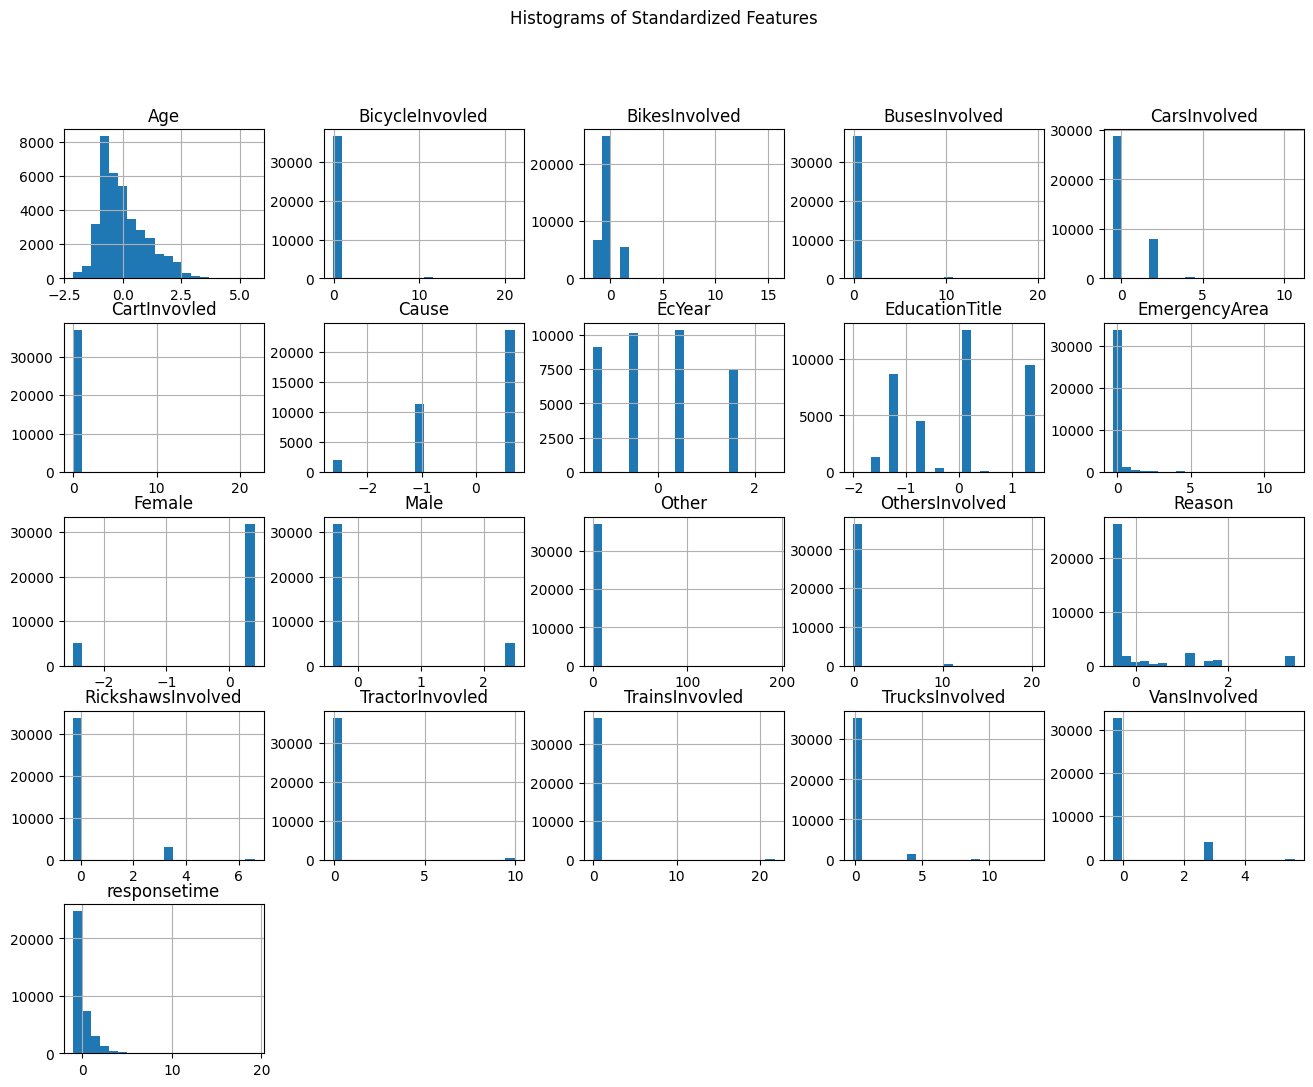

In [ ]:
# Plot histograms for the standardized training set
X_train_scaled.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms of Standardized Features")
plt.show()

#Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Step 2: Train the KNN model on the training data
knn.fit(X_train_minmax, Y_train)

# Step 3: Make predictions on the test set
Y_pred = knn.predict(X_test_minmax)

# Step 4: Evaluate the model
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.02      0.04       704
           1       0.76      0.91      0.83      6925
           2       0.00      0.00      0.00       178
           3       0.18      0.03      0.06      1349
           4       0.00      0.00      0.00        82

   micro avg       0.74      0.69      0.71      9238
   macro avg       0.23      0.19      0.18      9238
weighted avg       0.61      0.69      0.63      9238
 samples avg       0.69      0.69      0.69      9238

Accuracy Score: 0.6852132496211301


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
